<a href="https://colab.research.google.com/github/renardelyon/Deep-Learning-with-Python-Exercise/blob/main/Predicting_house_prices_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import boston_housing

(train_features,train_label),(test_features,test_label)=boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
train_features.shape

(404, 13)

In [4]:
train_label.shape

(404,)

In [5]:
train_label[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [6]:
train_features[:3]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00]])

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.fit_transform(test_features)

In [8]:
import tensorflow as tf
def build_model(X,y,val_data,X_test,y_test,num_epochs):
  model = tf.keras.Sequential([
          tf.keras.layers.Dense(64,activation='relu',
                              input_shape=(train_features.shape[1],)),
          tf.keras.layers.Dense(64,activation='relu'),
          tf.keras.layers.Dense(1)      
  ])
  
  model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
  
  history = model.fit(X,y,batch_size=1,epochs=num_epochs,
                      validation_data = val_data)
  val_mse, val_mae = model.evaluate(X_test,y_test)

  return history,val_mse,val_mae


In [ ]:
from sklearn.model_selection import KFold

k=4
kf = KFold(n_splits=k)
all_mae_history = []
for train_idx,test_idx in kf.split(train_features):
  X_train,X_val = train_features[train_idx],train_features[test_idx]
  y_train,y_val = train_label[train_idx],train_label[test_idx]

  history,val_mse,val_mae = build_model(X=X_train,y=y_train,
                                  val_data=(X_val,y_val),
                                  X_test=test_features,
                                  y_test=test_label,
                                  num_epochs=500)
  mae_history = history.history['val_mae']
  all_mae_history.append(mae_history)


In [23]:
mae_history = np.array(all_mae_history)

In [24]:
import numpy as np

mean_mae_history = np.mean(all_mae_history,axis=0)
mean_mae_history.shape

(500,)

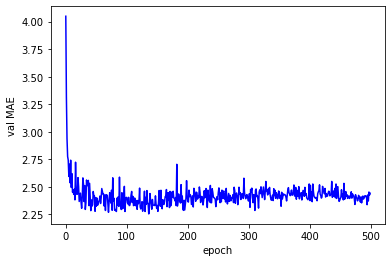

In [27]:
import matplotlib.pyplot as plt

epoch = range(mean_mae_history.shape[0])
plt.plot(epoch,mean_mae_history,'b-')
plt.xlabel('epoch')
plt.ylabel('val MAE')
plt.show()

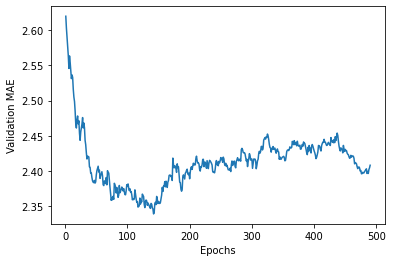

In [29]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(mean_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [30]:
history, test_mse, test_mae = build_model(X=train_features,y=train_label,val_data=None,
                                          X_test = test_features,y_test=test_label,
                                          num_epochs=130)
print(f'test mae score:{test_mae}')

Epoch 1/130
404/404 [==============================] - 1s 1ms/step - loss: 344.1069 - mae: 15.2951
Epoch 2/130
404/404 [==============================] - 0s 1ms/step - loss: 18.9055 - mae: 3.0895
Epoch 3/130
404/404 [==============================] - 0s 1ms/step - loss: 18.8985 - mae: 3.0071
Epoch 4/130
404/404 [==============================] - 0s 1ms/step - loss: 12.1419 - mae: 2.4385
Epoch 5/130
404/404 [==============================] - 0s 1ms/step - loss: 11.8687 - mae: 2.5692
Epoch 6/130
404/404 [==============================] - 0s 1ms/step - loss: 12.8674 - mae: 2.5374
Epoch 7/130
404/404 [==============================] - 0s 1ms/step - loss: 11.3504 - mae: 2.2761
Epoch 8/130
404/404 [==============================] - 0s 1ms/step - loss: 9.1945 - mae: 2.2274
Epoch 9/130
404/404 [==============================] - 0s 1ms/step - loss: 9.2012 - mae: 2.2862
Epoch 10/130
404/404 [==============================] - 0s 1ms/step - loss: 9.3486 - mae: 2.3151
Epoch 11/130
404/404 [========